# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [47]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Opening the MC and data frames

In [48]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)


# Display the top 10 rows of the DataFrame before changes
print("Before dropping the 'Subevent' column:")
display(data.head(10))

# Drop the 'Subevent' column
data = data.drop('Subevent', axis = 1)

# Display the top 10 rows of the DataFrame after changes
print("After dropping the 'Subevent' column:")
display(data.head(10))


Before dropping the 'Subevent' column:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,1,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,0,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,1,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0,0.220104,0.228


After dropping the 'Subevent' column:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


# You can display the dataframe by uncommenting these lines and running the cell

In [49]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [50]:
MC_EXT.head(10)

# Get the column names of each DataFrame as sets
columns_MC_EXT = set(MC_EXT.columns)
columns_data = set(data.columns)

# Find the common columns
common_columns = columns_MC_EXT & columns_data
print("Common columns:")
print(common_columns)

# Find the columns present in MC_EXT but not in data
diff_columns_MC_EXT = columns_MC_EXT - columns_data
print("\nColumns in MC_EXT but not in data:")
print(diff_columns_MC_EXT)

# Find the columns present in data but not in MC_EXT
diff_columns_data = columns_data - columns_MC_EXT
print("\nColumns in data but not in MC_EXT:")
print(diff_columns_data)


Common columns:
{'trk_sce_end_y_v', 'trk_llr_pid_score_v', 'trk_sce_end_x_v', 'reco_nu_vtx_sce_x', 'trk_score_v', 'reco_nu_vtx_sce_y', 'topological_score', 'trk_sce_start_x_v', 'trk_mcs_muon_mom_v', 'trk_sce_start_y_v', 'reco_nu_vtx_sce_z', 'trk_range_muon_mom_v', 'trk_energy_tot', '_closestNuCosmicDist', 'trk_len_v', 'trk_sce_start_z_v', 'category', 'trk_sce_end_z_v', 'trk_distance_v'}

Columns in MC_EXT but not in data:
{'true_muon_mom', 'true_L', 'true_E', 'weight'}

Columns in data but not in MC_EXT:
set()


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [51]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXT_VIS = MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot <= 2]

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

print("Displaying Dataframe:")
display(MC_EXT_VIS.head(10))

print("Displaying selections of the dataframe:")
display(MC_EXT_VIS[MC_EXT_VIS.category == 7])


Displaying Dataframe:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,44.434024,98.925629,1.022534,21,0.752569,835.13855,-48.857365,78.31308,0.998792,0.956722,739.571472,-72.798805,82.916519,82.853416,-71.752914,739.646667,0.894713,0.337684,0.399998,0.194605,1.173029,432.604614,0.226839
1,130.612268,44.08989,1.592704,21,0.999933,594.484253,-116.02845,109.856567,0.280381,0.823841,566.069458,-89.319977,99.65892,99.421127,-90.139221,564.735352,0.911677,0.211696,0.136,0.158957,1.219284,467.599365,0.318179
2,40.418756,15.413054,39.467907,21,0.998957,819.098816,77.97744,39.282635,0.663786,-0.669968,811.28772,65.11499,41.125572,41.812805,84.806618,776.932617,1.062944,0.131565,0.106,0.158957,1.397931,435.430145,0.205197
3,164.951332,36.126545,1.343673,21,0.999392,412.250427,-70.223282,201.777756,0.928692,0.644622,402.397034,-102.791687,189.843811,189.490341,-104.054550,401.839935,1.294695,0.191572,0.276,0.158957,1.678575,421.738617,0.517034
4,36.164580,82.394402,48.91061,31,0.954859,413.039093,38.670918,119.024979,0.986426,0.279236,337.450592,32.938976,130.041138,138.658707,6.522987,297.413605,0.819618,0.300918,0.228,0.158957,1.577072,424.164917,NaN
5,203.239727,218.759949,0.385408,7,0.036035,287.646667,116.698586,219.95639,1.0,0.976584,145.721725,-46.555309,191.8965,191.900848,-46.577881,145.333115,1.060595,0.599278,0.583998,0.257732,1.000000,0.000000,0.000000
6,87.119488,318.351593,1.078572,21,0.737705,572.6651,-90.800064,119.572273,1.0,0.986079,275.818024,-96.64756,218.468353,218.838593,-96.662163,274.802551,1.211032,0.820424,0.778998,0.158957,1.657397,450.758331,0.794323
7,0.302723,64.497452,0.305236,21,0.325886,537.900024,-65.112221,230.519562,0.982471,0.879629,515.351868,-4.765317,229.179764,229.240768,-4.667967,515.639526,0.404290,0.260239,0.366999,0.214935,0.469715,464.664581,0.255095
8,115.025053,159.26416,0.757,21,0.987595,263.017822,77.546669,174.682541,0.999993,0.946235,159.303452,72.588875,54.166004,53.579136,72.356430,158.891296,0.873051,0.469337,0.567996,0.189014,0.652758,448.740021,0.468905
9,35.850098,17.286919,3.508533,21,0.566651,230.114243,21.432034,108.653137,0.876753,0.616456,244.856247,12.644156,108.293961,107.715965,15.480117,246.792328,1.027170,0.137813,0.193,0.158957,1.298128,427.212402,0.926798


Displaying selections of the dataframe:


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
5,203.239727,218.759949,0.385408,7,0.036035,287.646667,116.698586,219.95639,1.0,0.976584,145.721725,-46.555309,191.8965,191.900848,-46.577881,145.333115,1.060595,0.599278,0.583998,0.257732,1.0,0.0,0.0
25,0.087495,180.394516,0.187981,7,0.030417,724.570496,-19.414288,180.058075,0.999987,0.962717,595.248718,-108.738251,91.821732,91.890831,-108.750244,595.422974,0.525922,0.515334,0.665995,0.257732,1.0,0.0,0.0
37,149.933458,89.501602,0.1785,7,0.247216,801.781555,35.87751,154.6987,0.973031,0.926391,804.439331,-33.508217,210.150986,210.175583,-33.649628,804.314453,0.472641,0.316798,0.322999,0.257732,1.0,0.0,0.0
45,37.239026,14.3737,1.398767,7,0.052839,769.82605,78.522751,237.200211,0.81798,0.562681,780.718506,81.226364,233.458405,232.923599,82.603073,780.472656,0.480985,0.127947,0.086,0.257732,1.0,0.0,0.0
48,8.116825,133.951324,0.393554,7,0.827913,871.678711,17.656094,153.539856,0.999971,0.953156,826.414917,-106.054321,131.566971,131.459595,-106.372757,826.198120,1.087201,0.414305,0.478997,0.257732,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14255,182.919527,80.02047,0.079768,7,0.001081,777.49353,-65.036682,181.888657,0.985461,0.915372,739.272888,-9.569799,139.404312,139.365402,-9.505402,739.241150,1.661621,0.295585,0.279,0.257732,1.0,0.0,0.0
14266,103.390707,101.356544,1.366542,7,0.098034,378.830902,11.382247,83.455452,0.987689,0.945756,353.988678,-79.835052,52.523224,52.775982,-79.936111,352.650391,0.502710,0.343045,0.285,0.257732,1.0,0.0,0.0
14275,0.179501,147.413391,0.179501,7,0.004485,822.86615,-12.088555,80.050476,0.99998,0.968837,755.497131,108.895699,30.010359,29.950224,109.037582,755.404785,0.455836,0.443578,0.631995,0.257732,1.0,0.0,0.0
14312,76.418173,69.420685,0.982242,7,0.093322,817.101318,105.068237,115.261353,0.957921,0.804852,830.849731,48.498928,77.808601,77.684929,48.550133,829.870789,0.404875,0.271553,0.345999,0.257732,1.0,0.0,0.0


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

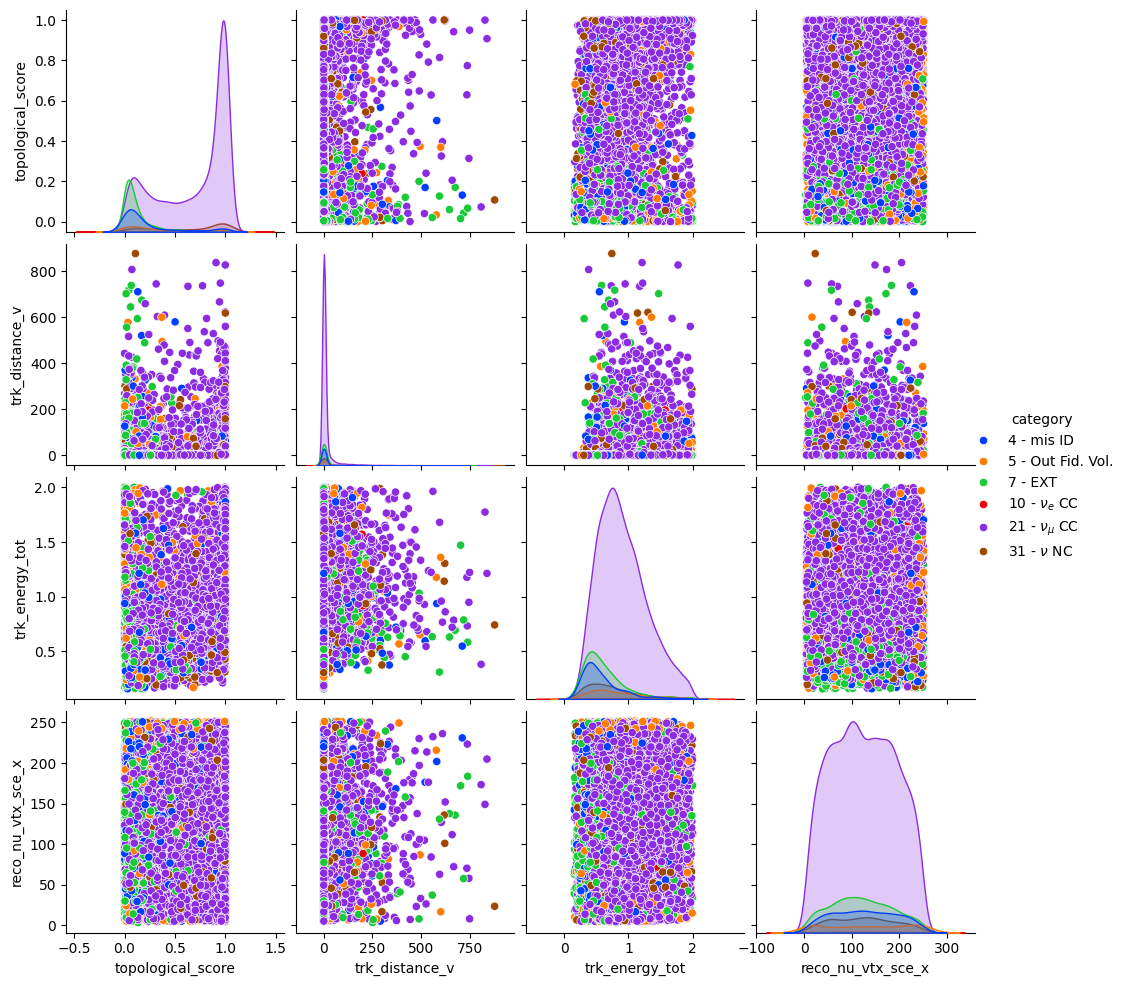

In [52]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

Filtered Dataframe for no Muon Neutrino Events


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
4,36.164580,82.394402,48.91061,31,0.954859,413.039093,38.670918,119.024979,0.986426,0.279236,337.450592,32.938976,130.041138,138.658707,6.522987,297.413605,0.819618,0.300918,0.228,0.158957,1.577072,424.164917,NaN
5,203.239727,218.759949,0.385408,7,0.036035,287.646667,116.698586,219.95639,1.0,0.976584,145.721725,-46.555309,191.8965,191.900848,-46.577881,145.333115,1.060595,0.599278,0.583998,0.257732,1.000000,0.000000,0.000000
13,82.701385,85.329475,0.176239,5,0.190802,113.476273,70.877899,234.242249,0.996,0.928489,56.568661,10.998526,213.961227,213.915817,10.858622,56.667503,0.324924,0.307491,0.347999,0.196225,0.763814,451.269196,0.643845
15,193.982779,17.371426,0.129148,31,0.723419,756.811096,48.697601,58.280075,0.875742,0.482973,769.919006,42.922081,48.554768,48.529713,42.894539,770.042297,0.652283,0.138087,0.16,0.158957,1.468410,454.683777,NaN
22,77.732885,82.9925,0.178411,4,0.147146,370.194061,-1.991538,18.616695,0.987403,0.909556,355.881195,-58.710114,76.881927,76.761169,-58.592159,355.940460,0.464205,0.302259,0.281,0.200684,1.430856,449.495483,0.436103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,173.324247,247.885956,0.770327,4,0.144328,904.902283,77.233276,21.985197,1.0,0.9707,879.123291,-57.920666,225.04776,224.443054,-57.602718,879.564514,1.212886,0.663448,0.602998,0.158957,1.767469,458.024506,0.673849
14312,76.418173,69.420685,0.982242,7,0.093322,817.101318,105.068237,115.261353,0.957921,0.804852,830.849731,48.498928,77.808601,77.684929,48.550133,829.870789,0.404875,0.271553,0.345999,0.257732,1.000000,0.000000,0.000000
14316,124.208376,114.153938,0.077359,4,0.147052,218.418427,120.764648,177.790665,0.998863,0.905608,228.915131,16.11677,220.083405,220.054108,16.192158,228.915100,0.673673,0.371133,0.337999,0.186746,0.777688,446.666321,0.213701
14320,125.609171,76.004921,0.038537,31,0.919533,204.547638,65.800415,221.275726,0.850854,0.939619,132.98082,48.489723,203.472366,203.489166,48.493221,133.015808,0.305159,0.286525,0.249,0.158957,0.933882,430.585663,NaN


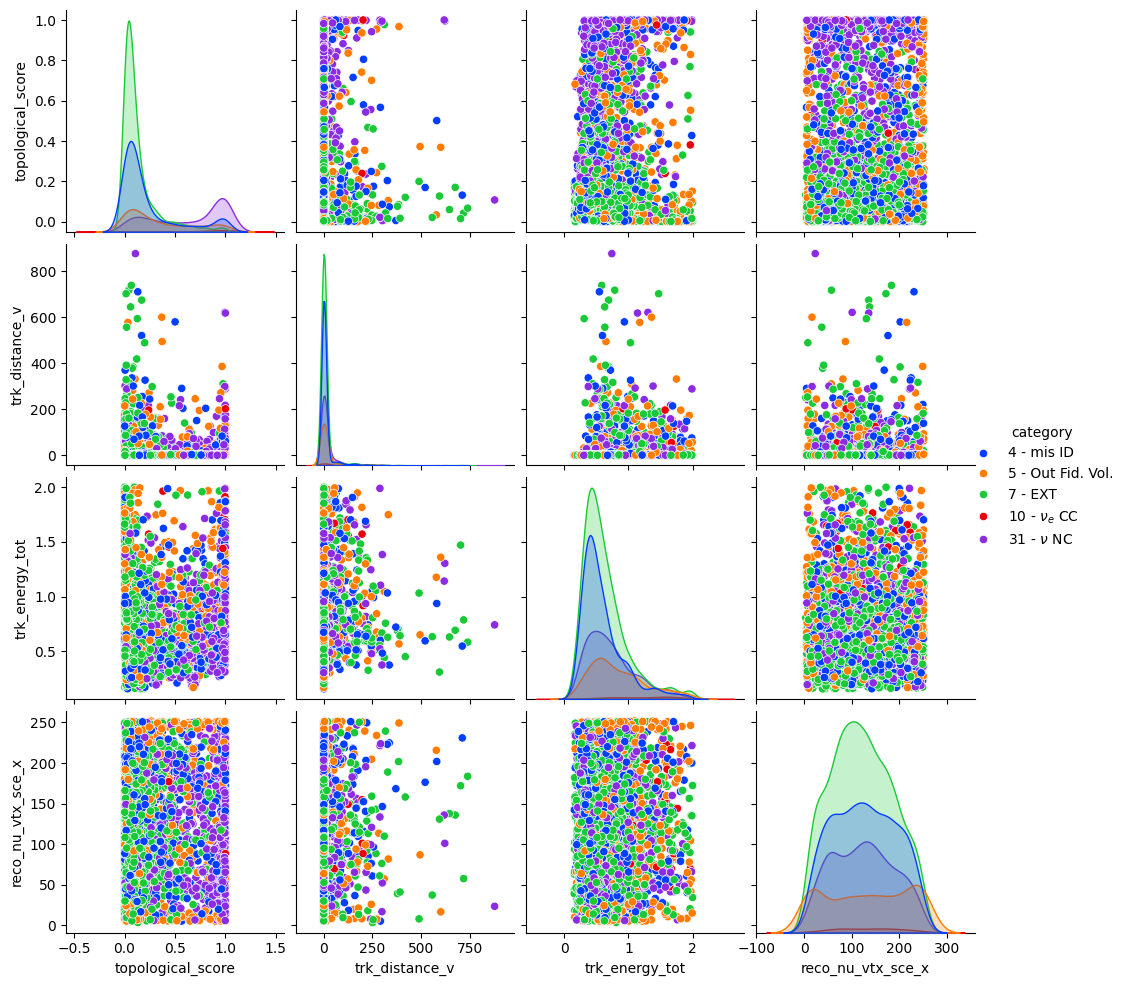

In [94]:
# Create a deep copy of MC_EXT_VIS without signal events
print("Filtered Dataframe for no Muon Neutrino Events")
display(MC_EXT_VIS[MC_EXT_VIS.category != 21])
MC_EXT_VIS_no21 = MC_EXT_VIS[MC_EXT_VIS.category != 21]

# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS_no21[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [54]:
# Plot your background events using sns.pairplot

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]


In [55]:
# Make sure to delete dataframe copies if you no longer need them!
##del MC_EXT_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [56]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))

# Remove muon neutrino and electron neutrino events.
MC_EXT_ML = MC_EXT_ML[~MC_EXT_ML.category.isin([21, 10])]

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  32017


In [57]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
##print()

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
y_train, y_test, x_train, x_test = train_test_split(y, X, test_size=0.2, train_size=0.8, random_state=1) # 80/20 training/test split

# Print the shape, should now be
print("\n(x_train) (y_train) shape:", x_train.shape, y_train.shape)
##print()


Shape of X: (32017, 16)
Shape of y: (32017,)

(x_train) (y_train) shape: (25613, 16) (25613,)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [90]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=8, random_state=1)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

Test the accuracies of your results:

In [92]:
# Produce predictions for the classification of your training dataset using your model:
y_pred_train = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred_train))
rf_acc_train = metrics.accuracy_score(y_train, y_pred_train)


y_pred_test = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred_test))
rf_acc_test = metrics.accuracy_score(y_test, y_pred_test)

Accuracy on training dataset: 0.6672783352203959
Accuracy on testing dataset: 0.6400687070580887


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

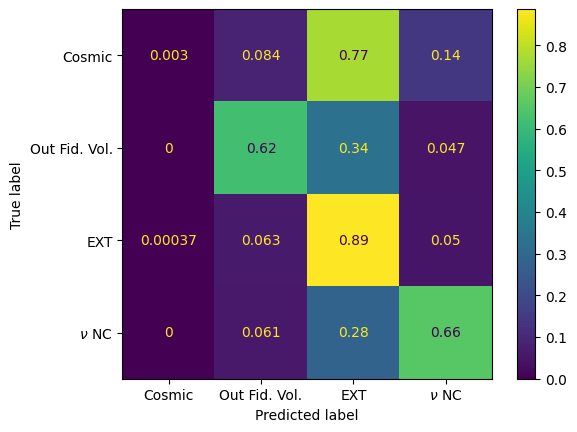

In [93]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred_test, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

Plot the importance of your different parameters.

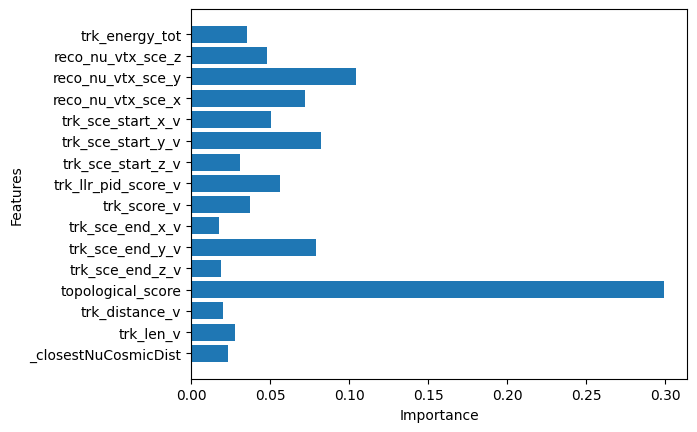

In [95]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [62]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [119]:
def Selections(frame: pd.DataFrame):

    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV



    # select the conditions you want to apply, here is an initial condition to get you started.
    # Define conditions
    condition1 = (trk_len_v > -1000) & (trk_len_v < 1000)
    condition2 = (trk_energy_tot <= 2)
    cond3 = (trk_start_x_v > -25) & (trk_start_x_v < 225)
    cond4 = (trk_end_x_v > -25) & (trk_end_x_v < 225)
    cond5 = (trk_start_y_v > -80) & (trk_start_y_v < 80)
    cond6 = (trk_end_y_v > -80) & (trk_end_y_v < 80)
    cond7 = (trk_start_z_v > -100) & (trk_start_z_v < 900)
    cond8 = (trk_end_z_v > -100) & (trk_end_z_v < 900)
    cond9 = (reco_x > 25)
    topcond = (topological > 0.5)

    # You can add more conditions here

    # Combine conditions
    selection = condition1 & condition2 & cond3 & cond5 & cond7 & cond4 & cond6 & cond8 & cond9 & topcond
    # If you have more conditions, you can add them like this:
    # selection = condition1 & condition2 & condition3 & ...
    # Apply selection on dataframe
    frame = frame[selection]

    return frame

## Calls the selection function on the dataframes

In [116]:
MC_EXT_CUT = Selections(MC_EXT)
data_frame = Selections(data)

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [117]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT_CUT)).intersection(list(data_frame)))
print(all_variables_to_plot)


['trk_sce_end_y_v', 'trk_llr_pid_score_v', 'trk_sce_end_x_v', 'reco_nu_vtx_sce_x', 'trk_score_v', 'reco_nu_vtx_sce_y', 'topological_score', 'trk_sce_start_x_v', 'trk_mcs_muon_mom_v', 'trk_sce_start_y_v', 'reco_nu_vtx_sce_z', 'trk_range_muon_mom_v', 'trk_energy_tot', '_closestNuCosmicDist', 'trk_len_v', 'trk_sce_start_z_v', 'category', 'trk_sce_end_z_v', 'trk_distance_v']


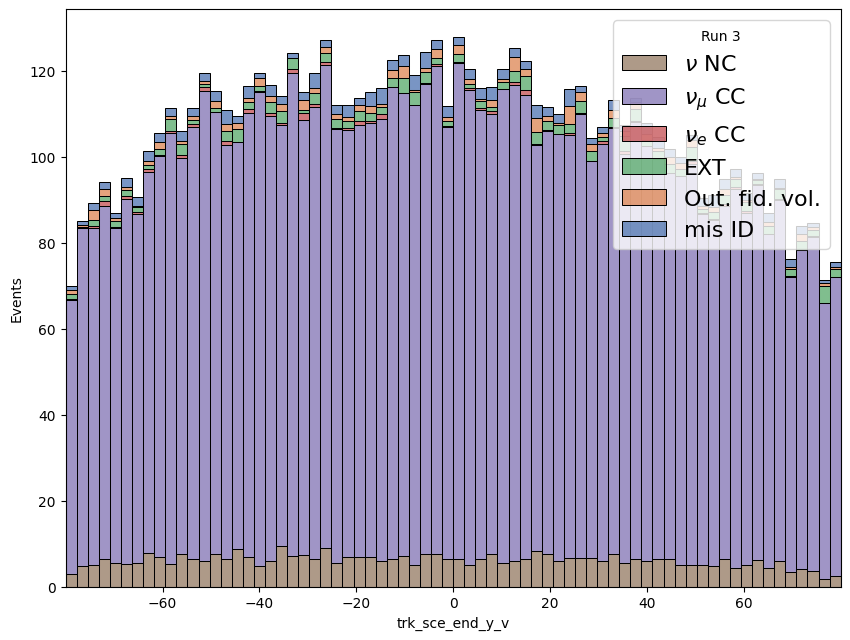

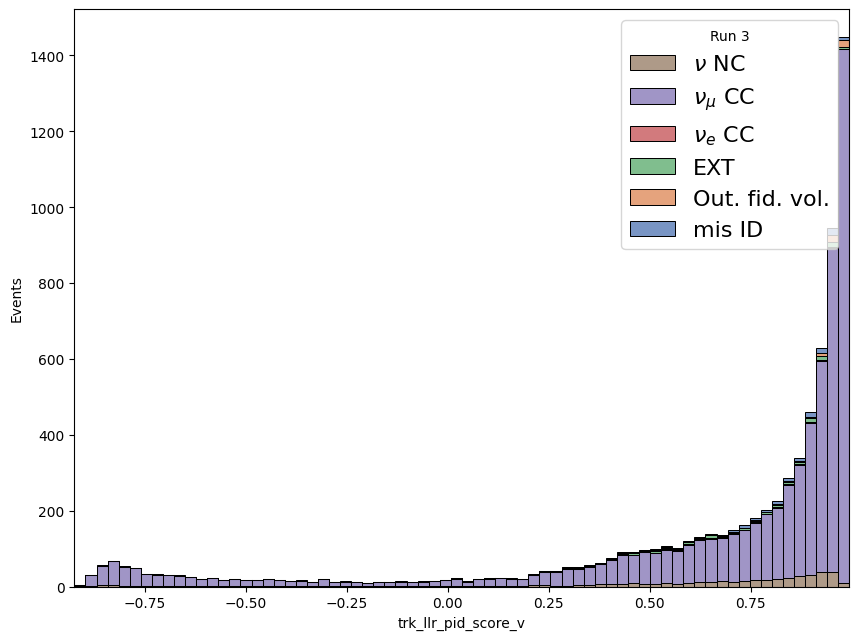

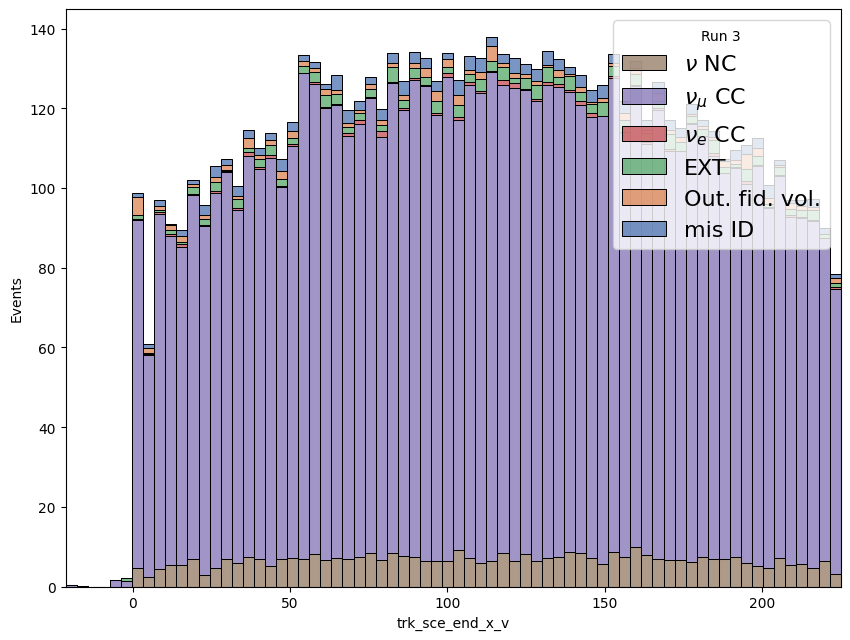

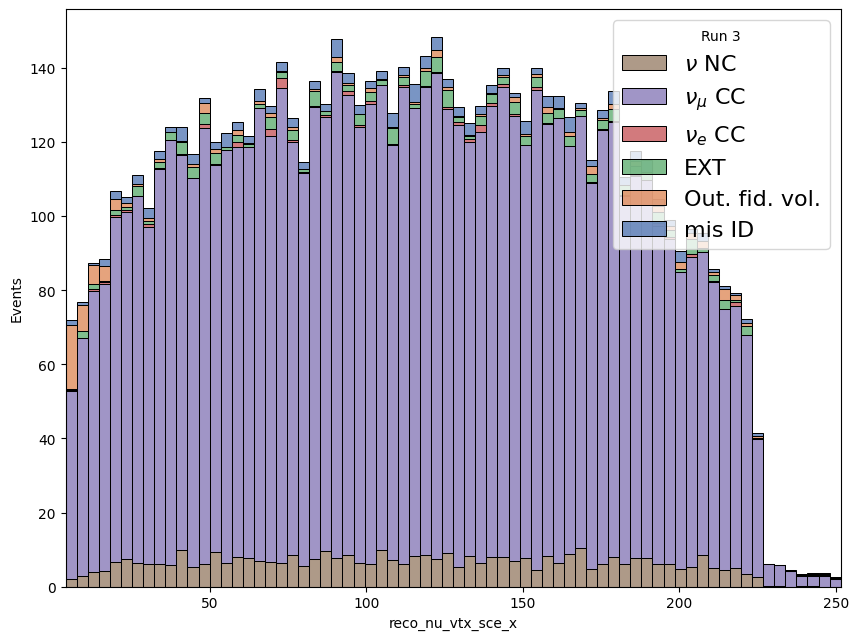

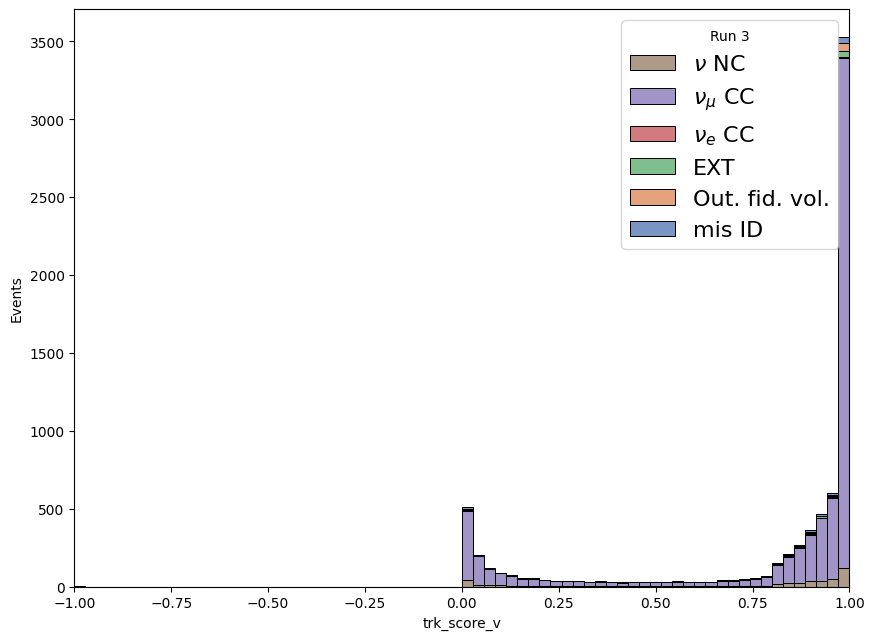

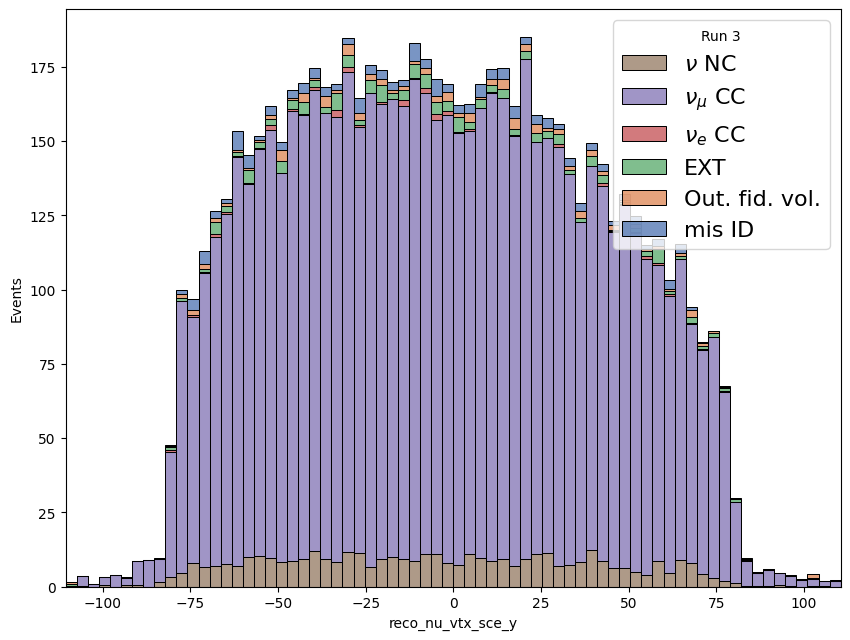

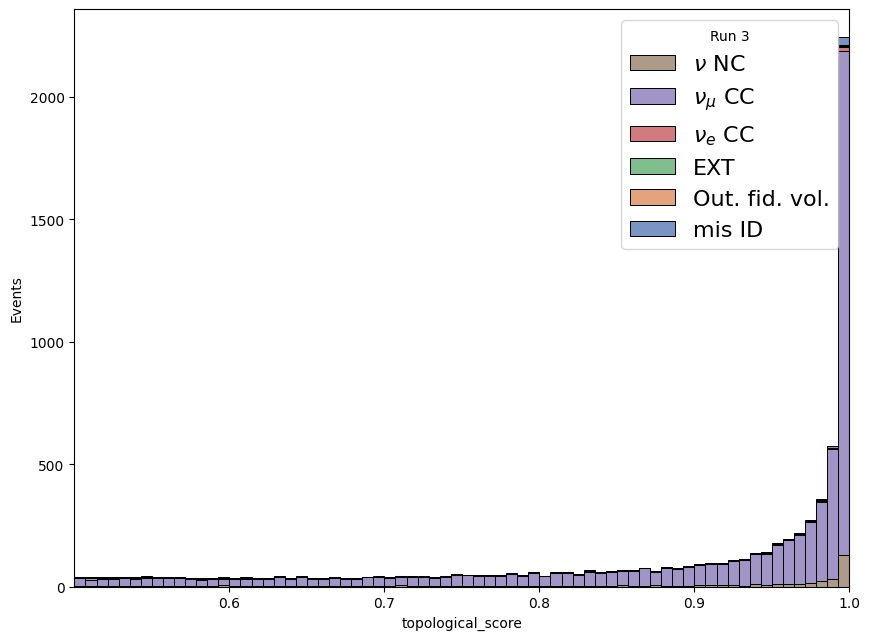

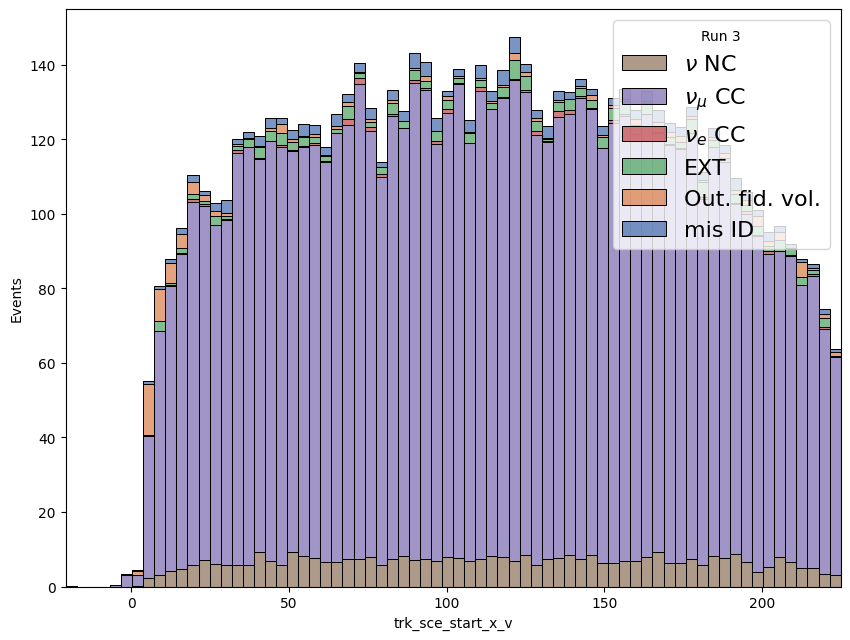

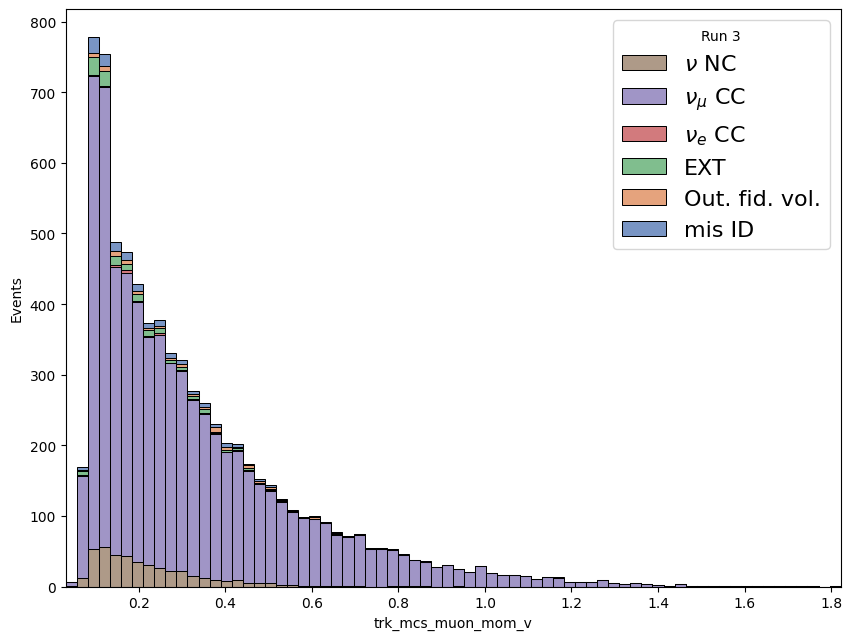

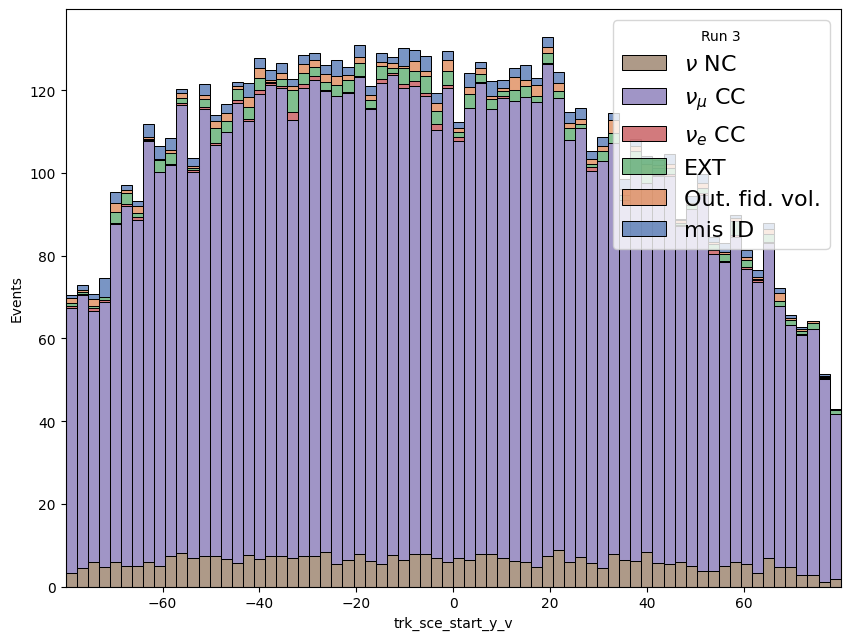

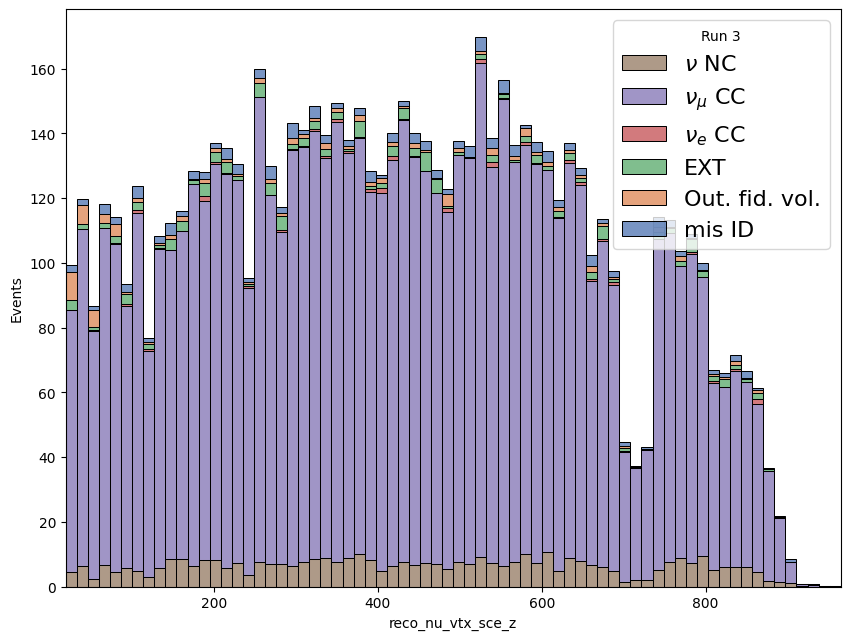

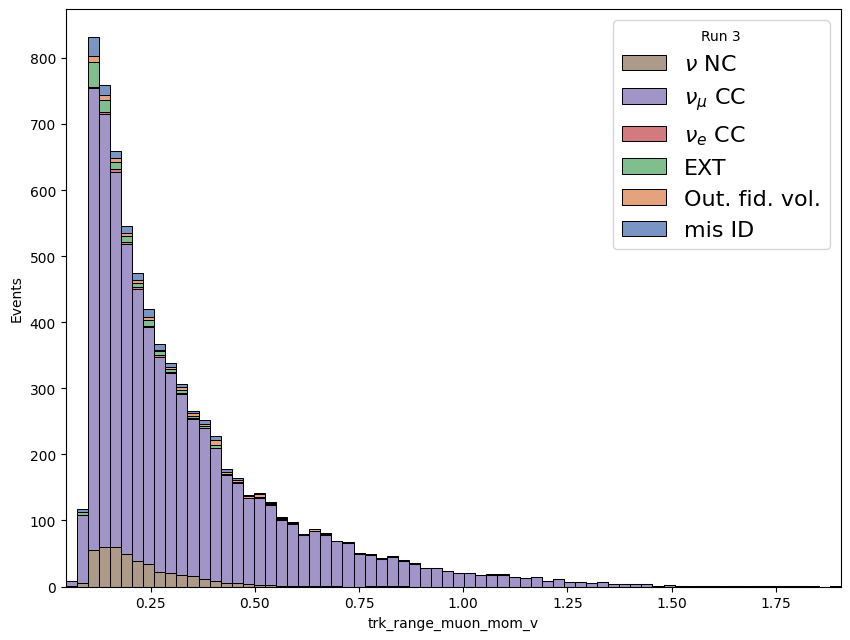

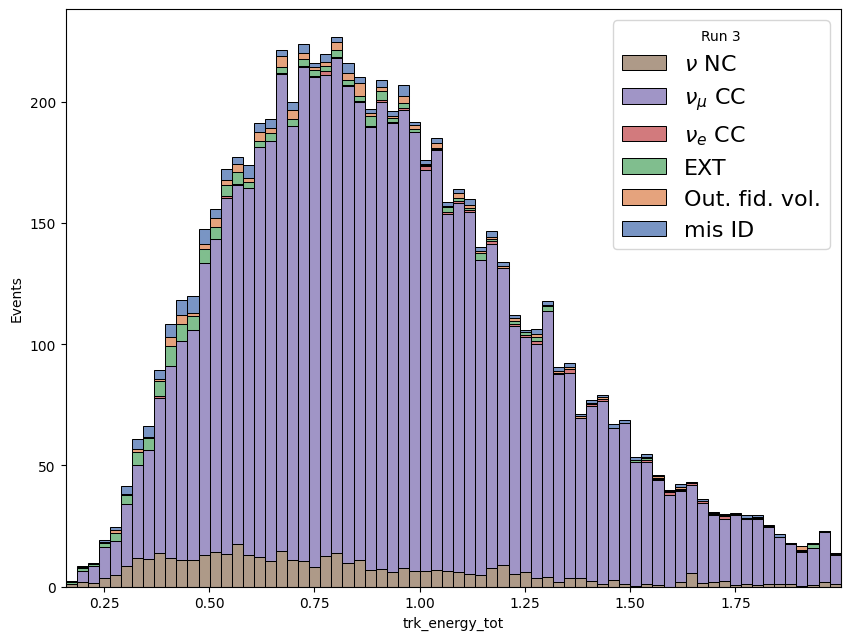

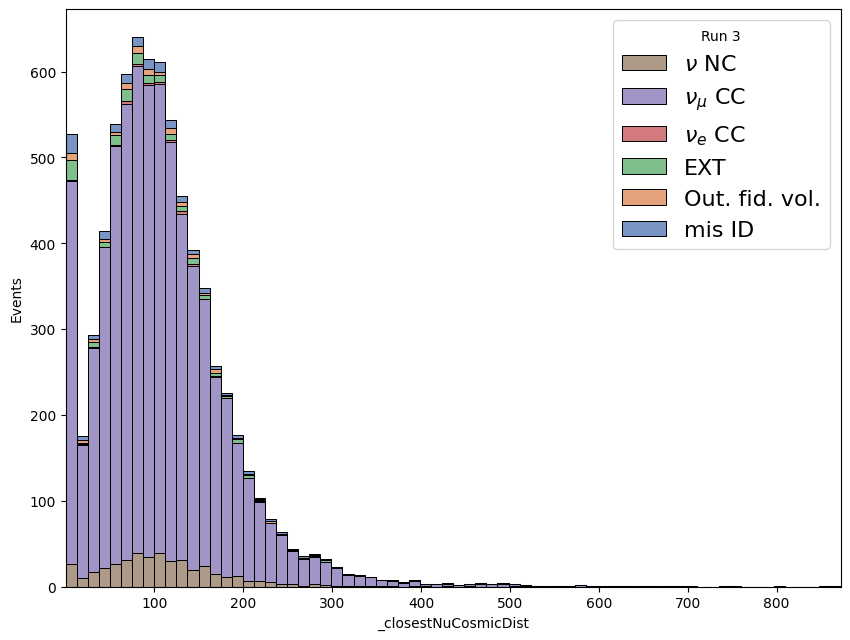

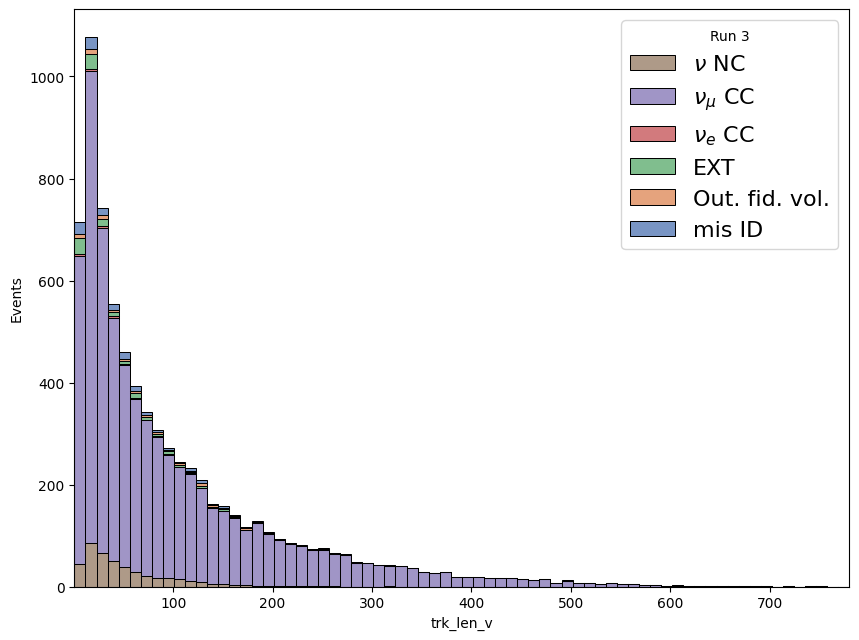

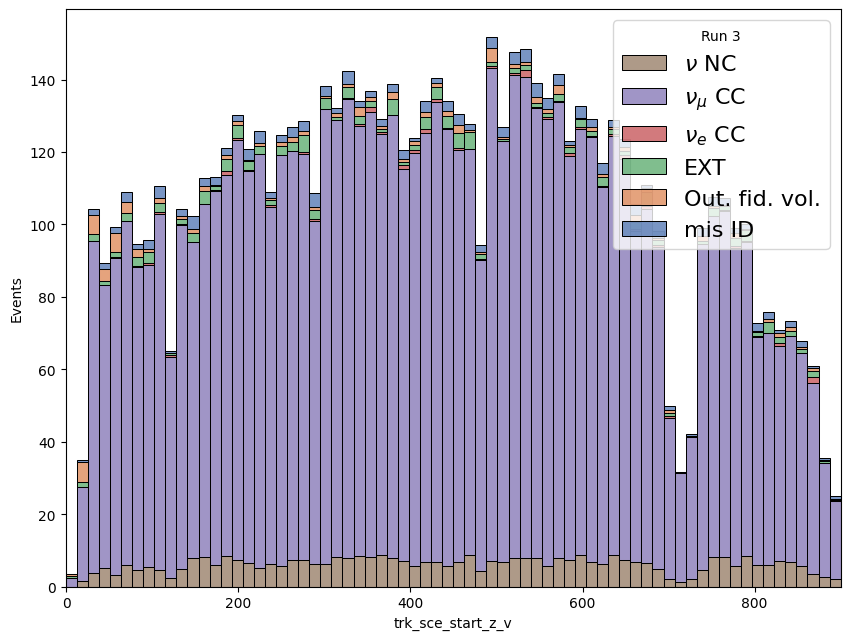

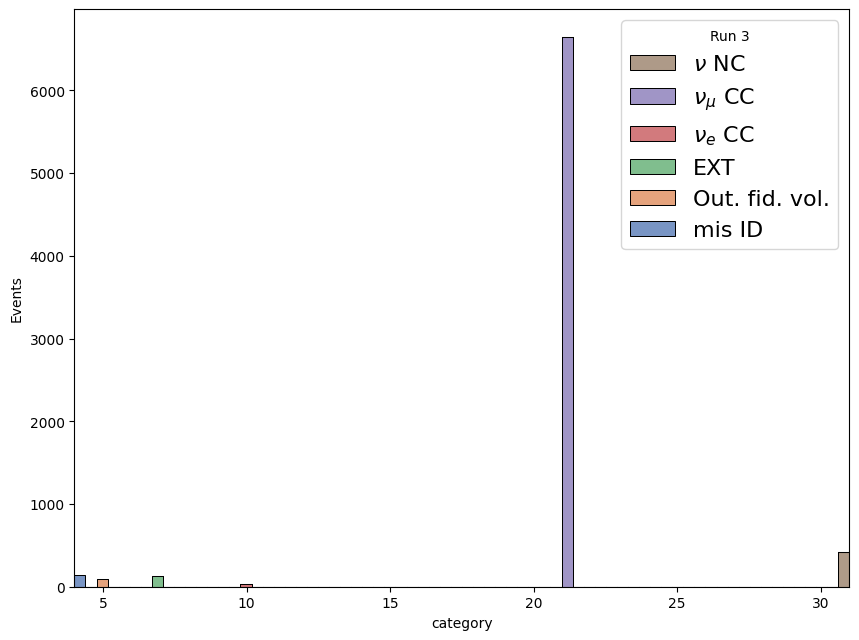

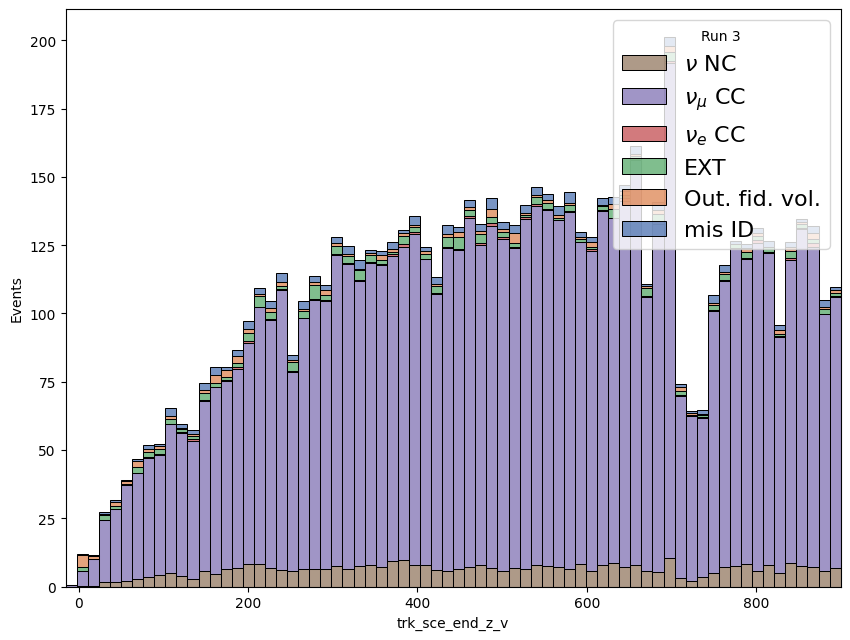

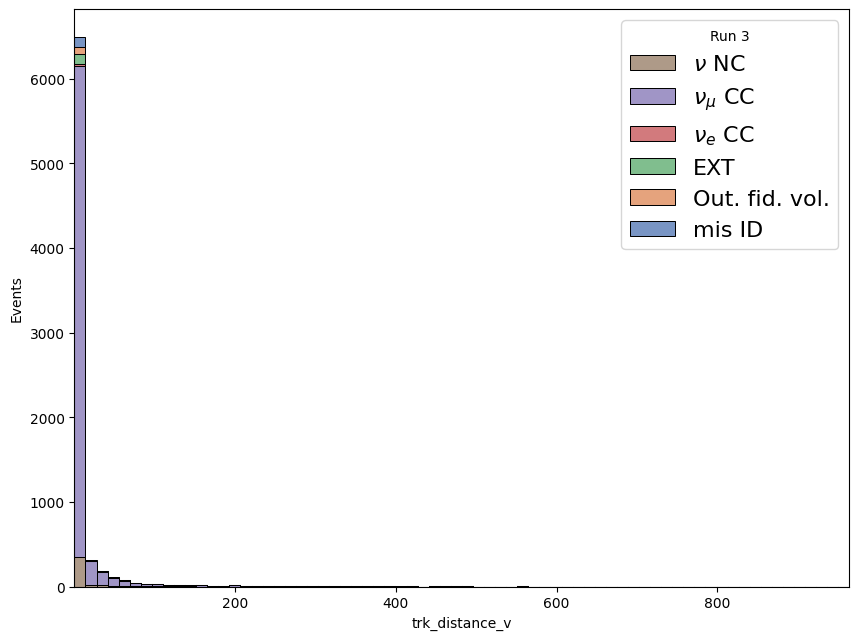

In [118]:
# Simple histogram plot of one variable.
BIN = 70

for variable in all_variables_to_plot:
    plt.figure(figsize=(10,7.5))
    i = sns.histplot(data=MC_EXT_CUT, x=variable, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=variable, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT_CUT[variable]), np.max(MC_EXT[variable])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
    plt.show(i)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [67]:
# oscillation function


In [68]:
# muon disappearance application to reconstructed neutrino energy


In [69]:
# chi squared function


# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

In [70]:
# Selection cuts on oscillated data

In [71]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)

In [72]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)

In [73]:
# plot contourf function and find minimum!

Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [74]:
# oscillate MC wrt to true data

In [75]:
# contourf application

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [76]:
# contour application, with correct confidence levels.

In [77]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [78]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

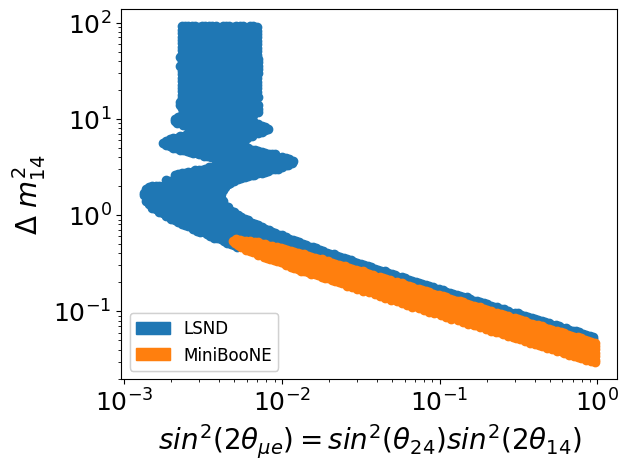

In [79]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)


plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()